In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [85]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [86]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


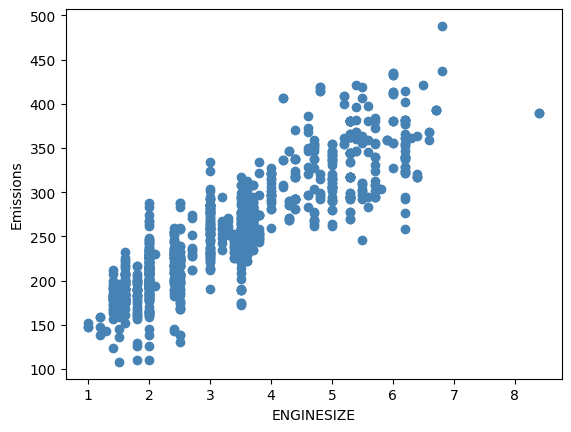

In [87]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [88]:
#Train/test split Method 

from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)

In polynomial regression, the relationship between the 
- independent variable =x and 
- dependent variable =y  
is modeled as nth degree polynomial in x .

2nd degree : y = ß0 + (ß1*X1) + ß2*X2²

   - For example, the original feature set has only one feature : **ENGINESIZE**
   - If we select the degree of the polynomial to be 2 :
      - It generates 3 features : degree=0, degree=1,degree=2   --> Coefficients. ß,ß1,ß2

In [89]:
from sklearn.preprocessing import PolynomialFeatures


train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)

In [90]:
train_x_poly=poly.fit_transform(train_x) #Transform to polynomial
print(train_x_poly)

[[ 1.    1.6   2.56]
 [ 1.    3.7  13.69]
 [ 1.    5.7  32.49]
 ...
 [ 1.    2.4   5.76]
 [ 1.    3.    9.  ]
 [ 1.    3.8  14.44]]



y = ß0 + (ß1*X1) + ß2*X2²

- Transformed data looks like feature sets of multiple linear regression analysis.
- Polynomial regression is a special case of linear regression, with selection your features .

**Model**

In [91]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [92]:
train_y_=clf.fit(train_x_poly,train_y)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [[ 0.         49.76088951 -1.38687234]]
Intercept: [108.27861483]


**Plot**

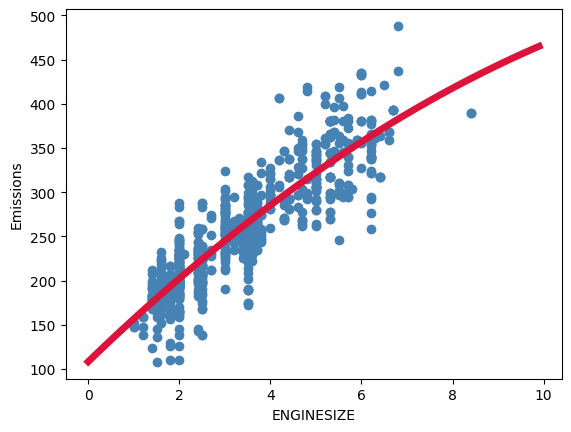

In [93]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="steelblue")
xx=np.arange(0.0,10.0,0.1)#Curve arttırarak plotta görselleştirmede kullanılır. 0-10 arasında x ekseni, 01,0.1 artar
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
#y = ß0 + (ß1*X1) + ß2*X2²

plt.plot(xx,yy,"crimson",linewidth=5)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()


In [94]:
print(f"x line value:",xx)
print(f"y line value: ",yy)

x line value: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
y line value:  [108.27861483 113.24083505 118.17531784 123.08206317 127.96107106
 132.8123415  137.63587449 142.43167004 147.19972814 151.94004879
 156.652632   161.33747776 165.99458607 170.62395694 175.22559036
 179.79948633 184.34564486 188.86406594 193.35474957 197.81769576
 202.2529045  206.66037579 211.04010964 215.39210604 219.71636499
 224.01288649 228.28167055 232.52271716 236.73602633 240.92159805
 245.07943232 249.20952915 253.31188852 257.38651046 261.43339494
 265.45254198 269.44395157 273.40762372 277.34355841 281.25175566
 285.13221547 288.98493783 292.80992

#### Evaluation 
- Mean Absolute Error (MAE)
- Mean Squarred  Error(MSE)
- R2 - Score 

1) test_y_ and test_y

In [95]:
test_x_poly=poly.transform(test_x)
test_y_=clf.predict(test_x_poly)

In [96]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# mae=mean_absolute_error(expected,predicted)
mae=mean_absolute_error(test_y_,test_y)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 22.081400247395386


In [97]:
# Mean Squarred  Error(MSE) 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


Residual sum of squares (MSE): 843.96


In [98]:
#R2 
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: 0.75


#### Practise

-Try to use a polynomial regresssion with the data set but this time with degree three(cubic).

- Doest it result in better accuracy?

#### Cubic Analysis

In [99]:
from sklearn.preprocessing import PolynomialFeatures


train_x3=np.asanyarray(train[["ENGINESIZE"]])
train_y3=np.asanyarray(train[["CO2EMISSIONS"]])

test_x3=np.asanyarray(test[["ENGINESIZE"]])
test_y3=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=3)

In [100]:
train_x_poly=poly.fit_transform(train_x3) #Transform to polynomial
print(train_x_poly)

[[  1.      1.6     2.56    4.096]
 [  1.      3.7    13.69   50.653]
 [  1.      5.7    32.49  185.193]
 ...
 [  1.      2.4     5.76   13.824]
 [  1.      3.      9.     27.   ]
 [  1.      3.8    14.44   54.872]]


**Model**

In [101]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [102]:
train_y_3=clf.fit(train_x_poly,train_y3)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [[ 0.         25.43653285  5.26488686 -0.54714315]]
Intercept: [134.24293393]


**Plot**

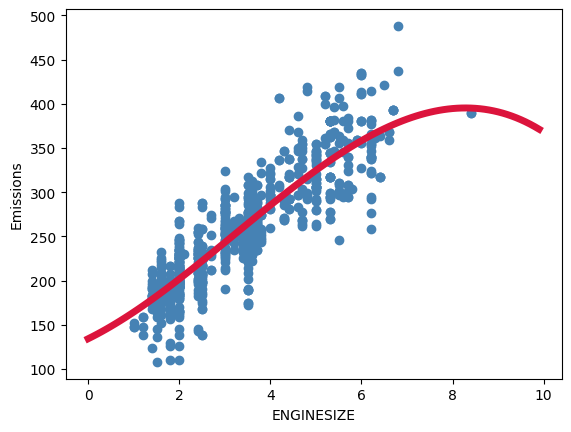

In [103]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="steelblue")
xx=np.arange(0.0,10.0,0.1)#Curve arttırarak plotta görselleştirmede kullanılır. 0-10 arasında x ekseni, 01,0.1 artar
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)+clf.coef_[0][3]*np.power(xx,3)
#y = ß0 + (ß1*X1) + ß2*X2²+ß3*X3^3

plt.plot(xx,yy,"crimson",linewidth=5)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [104]:
print(f"x line value:",xx)
print(f"y line value: ",yy)

x line value: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
y line value:  [134.24293393 136.83868894 139.53645883 142.33296073 145.2249118
 148.20902917 151.28202999 154.44063138 157.68155051 161.00150449
 164.39721049 167.86538563 171.40274707 175.00601193 178.67189736
 182.39712051 186.17839851 190.01244851 193.89598764 197.82573305
 201.79840188 205.81071126 209.85937835 213.94112028 218.05265419
 222.19069722 226.35196652 230.53317923 234.73105248 238.94230342
 243.16364919 247.39180693 251.62349378 255.85542688 260.08432338
 264.30690041 268.51987512 272.71996464 276.90388613 281.06835671
 285.21009353 289.32581373 293.412234

**Evaluation**

In [105]:
# 1 test_y_ and test_y
test_x_poly=poly.transform(test_x3)
test_y_3=clf.predict(test_x_poly)

In [109]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# mae=mean_absolute_error(expected,predicted)
mae=mean_absolute_error(test_y_3,test_y3)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 22.147380218845793


In [110]:
# Mean Squarred  Error(MSE) 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_3 - test_y3) ** 2))

Residual sum of squares (MSE): 847.82


In [111]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y3 , test_y_3) )

R2-score: 0.75
